In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy.stats import shapiro , ttest_ind , mannwhitneyu
import warnings
warnings.filterwarnings('ignore')

In [10]:
url = 'https://raw.githubusercontent.com/Reza18GG/heart_modeling/refs/heads/main/data/heart.csv'

df = pd.read_csv(url)
df

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [11]:
print(f"{df.info()}\n")
print(f"This Is a Shape Data: {df.shape}\n")
print(f"This a Duplicated Data: {df.duplicated().sum()}")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB
None

This Is a Shape Data: (303, 14)

This a Duplicated Data: 1


In [12]:
df.drop_duplicates(inplace=True)

In [13]:
df.isna().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

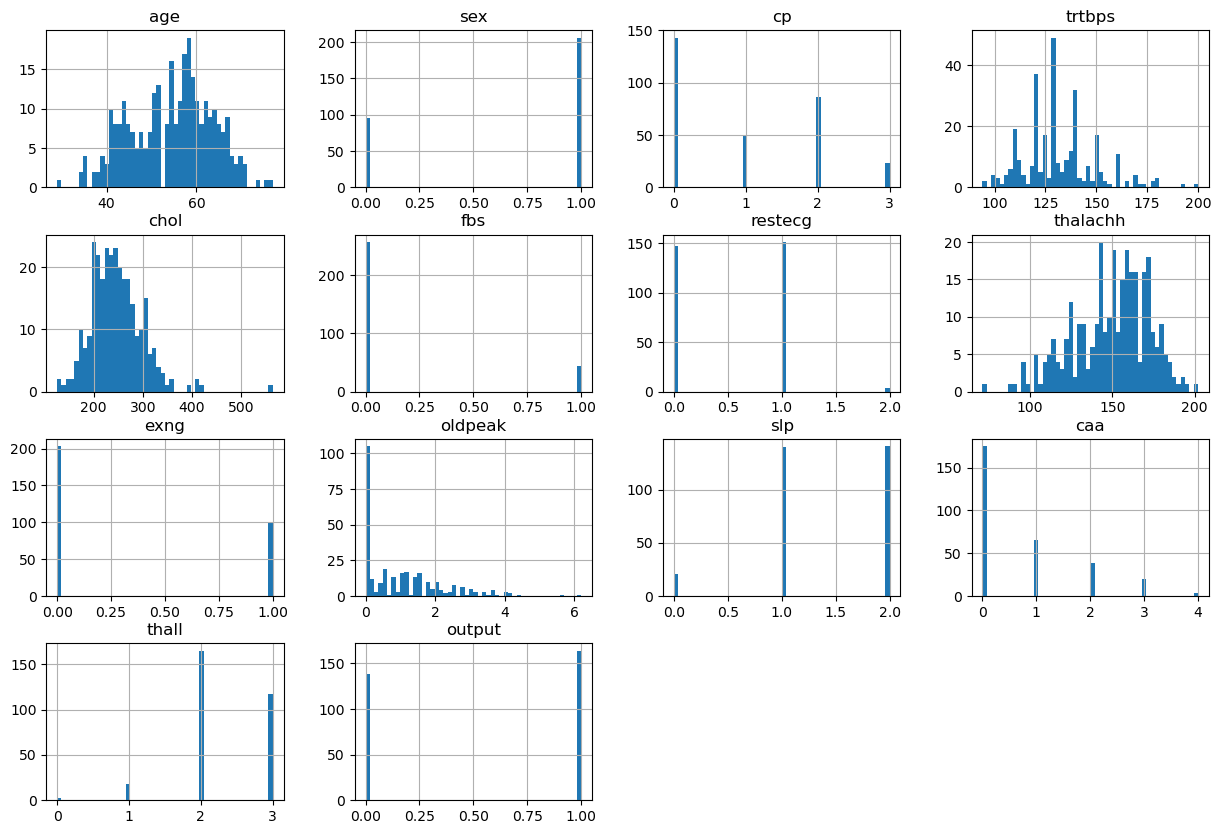

In [14]:
df.hist(bins=50 , figsize=(15 ,10))
plt.show();

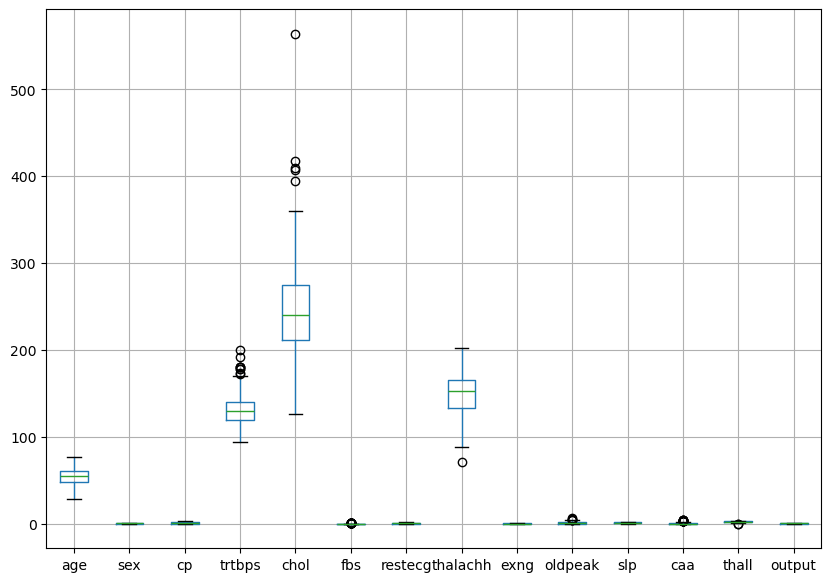

In [15]:
df.boxplot(figsize=(10 ,7))
plt.show()

# شناسایی داده های پرت و تغییر اونا

به دو روش دیتا های پرت رو شناسایی میکنیم


## روش اول

In [16]:
# روش اول که خیلی خوب لود برای این دیتا

for col in df.columns:
    if col == 'output':
        continue

    Q1 , Q3 = np.quantile(df[col] , [0.25 , 0.75])
    IQR = Q3 - Q1
    max_IQR = Q3 + 1 * IQR
    min_IQR = Q1 - 1 * IQR

    df.loc[df[col] > max_IQR , col] = np.nan
    df.loc[df[col] < min_IQR , col] = np.nan

    df[col].fillna(df[col].mode()[0] , inplace=True)
df

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63.0,1.0,3.0,145.0,233.0,0.0,0.0,150.0,0.0,2.3,0.0,0.0,1.0,1
1,37.0,1.0,2.0,130.0,250.0,0.0,1.0,187.0,0.0,0.0,0.0,0.0,2.0,1
2,41.0,0.0,1.0,130.0,204.0,0.0,0.0,172.0,0.0,1.4,2.0,0.0,2.0,1
3,56.0,1.0,1.0,120.0,236.0,0.0,1.0,178.0,0.0,0.8,2.0,0.0,2.0,1
4,57.0,0.0,0.0,120.0,197.0,0.0,1.0,163.0,1.0,0.6,2.0,0.0,2.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57.0,0.0,0.0,140.0,241.0,0.0,1.0,123.0,1.0,0.2,1.0,0.0,3.0,0
299,45.0,1.0,3.0,110.0,264.0,0.0,1.0,132.0,0.0,1.2,1.0,0.0,3.0,0
300,68.0,1.0,0.0,144.0,193.0,0.0,1.0,141.0,0.0,0.0,1.0,2.0,3.0,0
301,57.0,1.0,0.0,130.0,197.0,0.0,1.0,115.0,1.0,1.2,1.0,1.0,3.0,0


## روش دوم

In [17]:
# for col in df.columns:
#     if col == 'output':
#         continue



#     Q1 , Q3 = np.quantile(df[col] , [0.25 , 0.75])
#     IQR = Q3 - Q1
#     max_IQR = Q3 + 3.5 * IQR
#     min_IQR = Q1 - 3.5 * IQR

#     STD = np.std(df[col])
#     max_std = 5 * STD
#     min_std = -5 * STD

#     df.loc[(df[col] < min_IQR) & (df[col] < min_std) , col] = np.nan
#     df.loc[(df[col] > max_IQR) & (df[col] < max_std) , col] = np.nan
#     df[col].fillna(df[col].mean() , inplace=True)


# df

In [18]:
df.isna().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

In [19]:
df.duplicated().sum()

0

In [20]:
df.drop_duplicates(inplace=True)

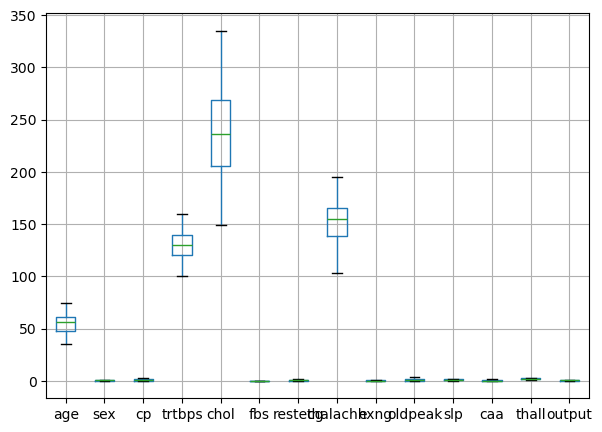

In [21]:
plt.figure(figsize=(7,5))
df.boxplot()
plt.show()

In [22]:
for i in df.columns:
    df[i] = df[i].astype(np.int16)

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 302 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   age       302 non-null    int16
 1   sex       302 non-null    int16
 2   cp        302 non-null    int16
 3   trtbps    302 non-null    int16
 4   chol      302 non-null    int16
 5   fbs       302 non-null    int16
 6   restecg   302 non-null    int16
 7   thalachh  302 non-null    int16
 8   exng      302 non-null    int16
 9   oldpeak   302 non-null    int16
 10  slp       302 non-null    int16
 11  caa       302 non-null    int16
 12  thall     302 non-null    int16
 13  output    302 non-null    int16
dtypes: int16(14)
memory usage: 10.6 KB


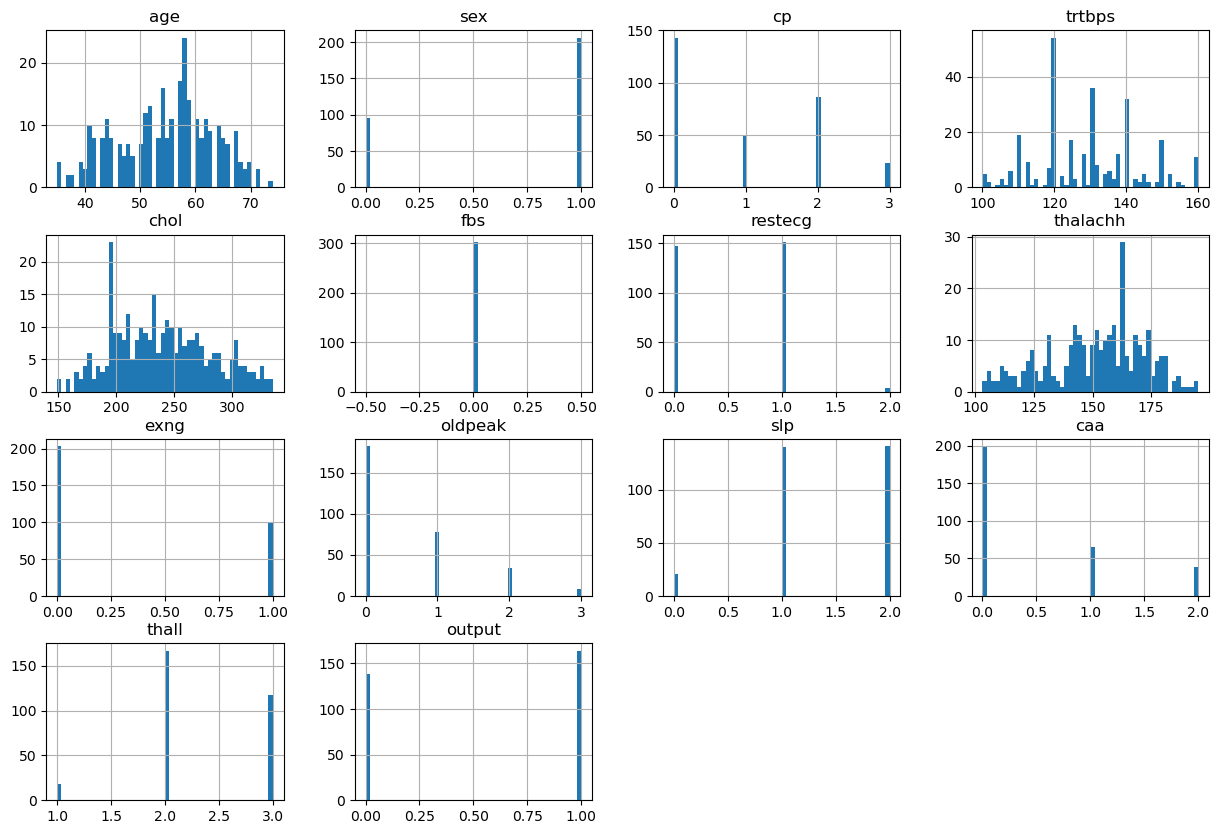

In [23]:
df.hist(bins=50 , figsize=(15 ,10))
plt.show();

In [24]:
for i in df.columns:
    if i == 'output':
        df['Target'] = df['output']
        df.drop('output' , axis=1 , inplace=True)

In [25]:
df

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,Target
0,63,1,3,145,233,0,0,150,0,2,0,0,1,1
1,37,1,2,130,250,0,1,187,0,0,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0,2,0,2,1
4,57,0,0,120,197,0,1,163,1,0,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1,1,0,3,0
300,68,1,0,144,193,0,1,141,0,0,1,2,3,0
301,57,1,0,130,197,0,1,115,1,1,1,1,3,0


In [26]:
df_false = df[df['Target'] == 0]
df_true = df[df['Target'] == 1]

In [27]:
stat , p = shapiro(df['age'])
p

0.00021671100817033785

In [28]:
if p > 0.05:
    t_stat , p_val = ttest_ind(df[df_false['age'] , df_true['age']])
    print(f"T_test --> {p_val}")
else:
    u_stat , p_val = mannwhitneyu(df_false['age'] , df_true['age'])
    print(f"Mann-Whitney-U --> {p_val}")

Mann-Whitney-U --> 0.00013520988936277915


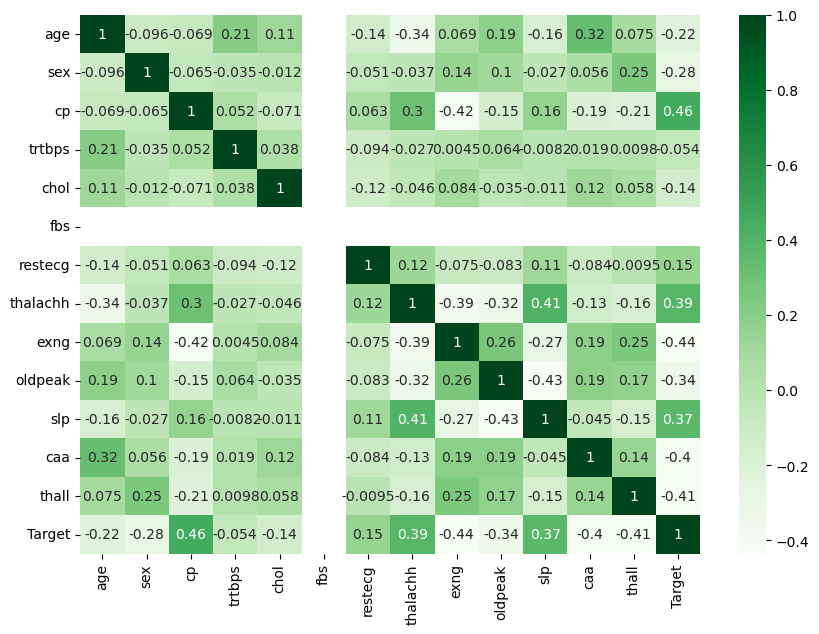

In [29]:
corr = df.corr(method='spearman')
plt.figure(figsize=(10 ,7))
sns.heatmap(corr , annot=True , cmap='Greens')
plt.show();

In [30]:
Y = df['Target']
X = df.drop('Target',axis=1)
X

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall
0,63,1,3,145,233,0,0,150,0,2,0,0,1
1,37,1,2,130,250,0,1,187,0,0,0,0,2
2,41,0,1,130,204,0,0,172,0,1,2,0,2
3,56,1,1,120,236,0,1,178,0,0,2,0,2
4,57,0,0,120,197,0,1,163,1,0,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0,1,0,3
299,45,1,3,110,264,0,1,132,0,1,1,0,3
300,68,1,0,144,193,0,1,141,0,0,1,2,3
301,57,1,0,130,197,0,1,115,1,1,1,1,3


In [31]:
from sklearn.model_selection import train_test_split , GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score , recall_score , f1_score ,confusion_matrix

In [32]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [33]:
X_train , X_test , Y_train , Y_test = train_test_split(X , Y, test_size=(0.2) , random_state=42)

# یه تابع برای محاسبه متریک هامون

In [34]:
def calculate_metrics(Y_train , Y_test , Y_pred_train , Y_pred_test):
    # accuracy score
    acc_train = accuracy_score(y_true=Y_train , y_pred = Y_pred_train)
    acc_test = accuracy_score(y_true=Y_test , y_pred = Y_pred_test)
    # recall score
    recall_train = recall_score(y_true=Y_train ,  y_pred = Y_pred_train)
    recall_test = recall_score(y_true=Y_test ,  y_pred = Y_pred_test)
    # f1 score
    f1_train = f1_score(y_true=Y_train , y_pred=Y_pred_train)
    f1_test = f1_score(y_true=Y_test , y_pred=Y_pred_test)

    print(f"Accuracy Trian: {acc_train} - Accuracy Test: {acc_test} \nRecall Trian: {recall_train} - Recall Test: {recall_test}\nF1 Train: {f1_train} - F1 Test : {f1_test}")

    return acc_train , acc_test , recall_train , recall_test , f1_train , f1_test

In [35]:
param_grid = {
    'n_neighbors' : [2 ,3 ,4 ,5 ,6 ,7 ,8 ,9 ,10 ,11 ,12 ,3 ,14 ,15],
     'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'minkowski'],
    'p' : [1 ,2]
}

grid_knn = GridSearchCV(
    KNeighborsClassifier(),
    param_grid,
    cv = 5 ,
)

grid_knn.fit(X_train , Y_train)

print(f'is a best param : {grid_knn.best_params_}')
print(f'is a best score : {grid_knn.best_score_}')

is a best param : {'metric': 'euclidean', 'n_neighbors': 4, 'p': 1, 'weights': 'distance'}
is a best score : 0.838265306122449


In [36]:
knn = KNeighborsClassifier(metric='euclidean' , n_neighbors= 6 , p=2 , weights='uniform')
knn.fit(X_train , Y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=6)

In [37]:
Y_pred_train = knn.predict(X_train)
Y_pred_test = knn.predict(X_test)

In [38]:
acc_train_knn , acc_test_knn , recall_train_knn , recall_test_knn , f1_train_knn , f1_test_knn = calculate_metrics(Y_train , Y_test , Y_pred_train , Y_pred_test)

Accuracy Trian: 0.8381742738589212 - Accuracy Test: 0.8688524590163934 
Recall Trian: 0.8484848484848485 - Recall Test: 0.875
F1 Train: 0.8517110266159695 - F1 Test : 0.875


In [39]:
con_knn = confusion_matrix(Y_pred_test , Y_test)
con_knn

array([[25,  4],
       [ 4, 28]], dtype=int64)

In [40]:
rf = RandomForestClassifier(max_depth=2, min_samples_leaf=20, n_estimators=650 , criterion='gini' , min_samples_split=40)
rf.fit(X_train , Y_train)

RandomForestClassifier(max_depth=2, min_samples_leaf=20, min_samples_split=40,
                       n_estimators=650)

In [41]:
Y_pred_train = rf.predict(X_train)
Y_pred_test = rf.predict(X_test)

In [42]:
acc_train_rf , acc_test_rf , recall_train_rf , recall_test_rf , f1_train_rf , f1_test_rf = calculate_metrics(Y_train , Y_test , Y_pred_train , Y_pred_test)

Accuracy Trian: 0.8464730290456431 - Accuracy Test: 0.819672131147541 
Recall Trian: 0.9090909090909091 - Recall Test: 0.90625
F1 Train: 0.8664259927797834 - F1 Test : 0.8405797101449275


In [43]:
con_rf = confusion_matrix(Y_pred_test , Y_test)
con_rf

array([[21,  3],
       [ 8, 29]], dtype=int64)

In [44]:
param_grid = {

    'penalty' : ['l1' , 'l2' , 'elasticnet' , 'none'],
    'C' : [0.01 ,0.05 , 0.10 , 0.15 , 0.20],
    'solver' : ['lbfgs' , 'liblinear'],
    'max_iter' : [100 ,200 ,300 ,400 ,500],
    'multi_class' : ['auto' , 'multinomial'],

 }

grid_lg = GridSearchCV(
    LogisticRegression(),
    param_grid,
    cv = 5 ,
)

grid_lg.fit(X_train , Y_train)

print(f'is a best param : {grid_lg.best_params_}')
print(f'is a best score : {grid_lg.best_score_}')

is a best param : {'C': 0.1, 'max_iter': 100, 'multi_class': 'auto', 'penalty': 'l2', 'solver': 'liblinear'}
is a best score : 0.8341836734693878


In [45]:
lg = LogisticRegression(C=0.005 , max_iter=120)
lg.fit(X_train , Y_train)

LogisticRegression(C=0.005, max_iter=120)

In [46]:
Y_pred_trian = lg.predict(X_train)
Y_pred_test = lg.predict(X_test)

In [47]:
acc_train_lg , acc_test_lg , recall_train_lg , recall_test_lg , f1_train_lg , f1_test_lg = calculate_metrics(Y_train , Y_test , Y_pred_train , Y_pred_test)

Accuracy Trian: 0.8464730290456431 - Accuracy Test: 0.819672131147541 
Recall Trian: 0.9090909090909091 - Recall Test: 0.90625
F1 Train: 0.8664259927797834 - F1 Test : 0.8405797101449275


In [48]:
con_lg = confusion_matrix(Y_pred_test , Y_test)
con_lg

array([[21,  3],
       [ 8, 29]], dtype=int64)

In [49]:
svm = SVC(C=0.6 ,gamma='auto')
svm.fit(X_train , Y_train)

SVC(C=0.6, gamma='auto')

In [50]:
Y_pred_train = svm.predict(X_train)
Y_pred_test = svm.predict(X_test)

In [51]:
acc_train_svm , acc_test_svm , recall_train_svm , recall_test_svm , f1_train_svm , f1_test_svm = calculate_metrics(Y_train , Y_test , Y_pred_train , Y_pred_test)

Accuracy Trian: 0.8962655601659751 - Accuracy Test: 0.9180327868852459 
Recall Trian: 0.9621212121212122 - Recall Test: 0.90625
F1 Train: 0.910394265232975 - F1 Test : 0.9206349206349206


In [52]:
con_svm = confusion_matrix(Y_pred_test , Y_test)
con_svm

array([[27,  3],
       [ 2, 29]], dtype=int64)